In [1]:
#import basic data packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import ecommerce data from csv into pandas DataFrame callec 'customers'
customers=pd.read_csv('Ecommerce Customers')
#return info on new DataFram
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
#check the dataframe header
customers.head(2)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933


In [6]:
#obtain basic statistical measures on customers
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


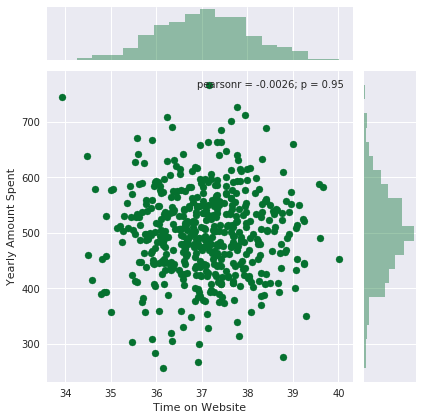

In [17]:
#making a jointplot to explore 'time on website' vs 'yearly amount spend', but first setting the style
sns.set(style='darkgrid')
sns.set_palette('BuGn_r')
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

#not mutch correlation between the two

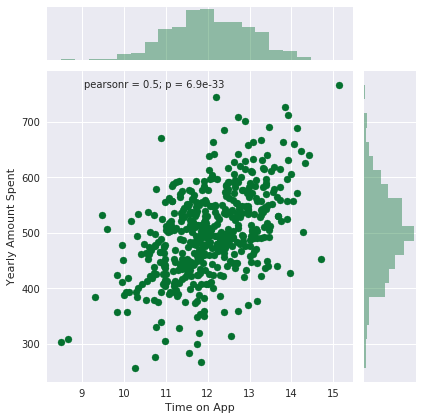

In [18]:
#comparing time on app and amount spent
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

#seems that there is positive correlation, we can explore later

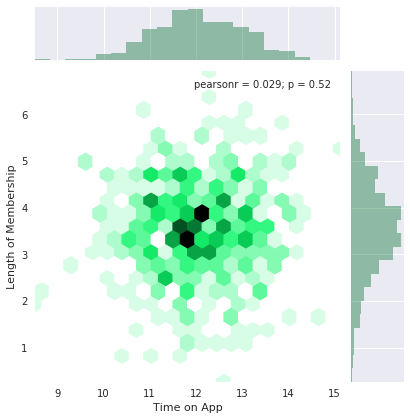

In [19]:
#what about time on app and length of membership
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)
#nothing standing out here

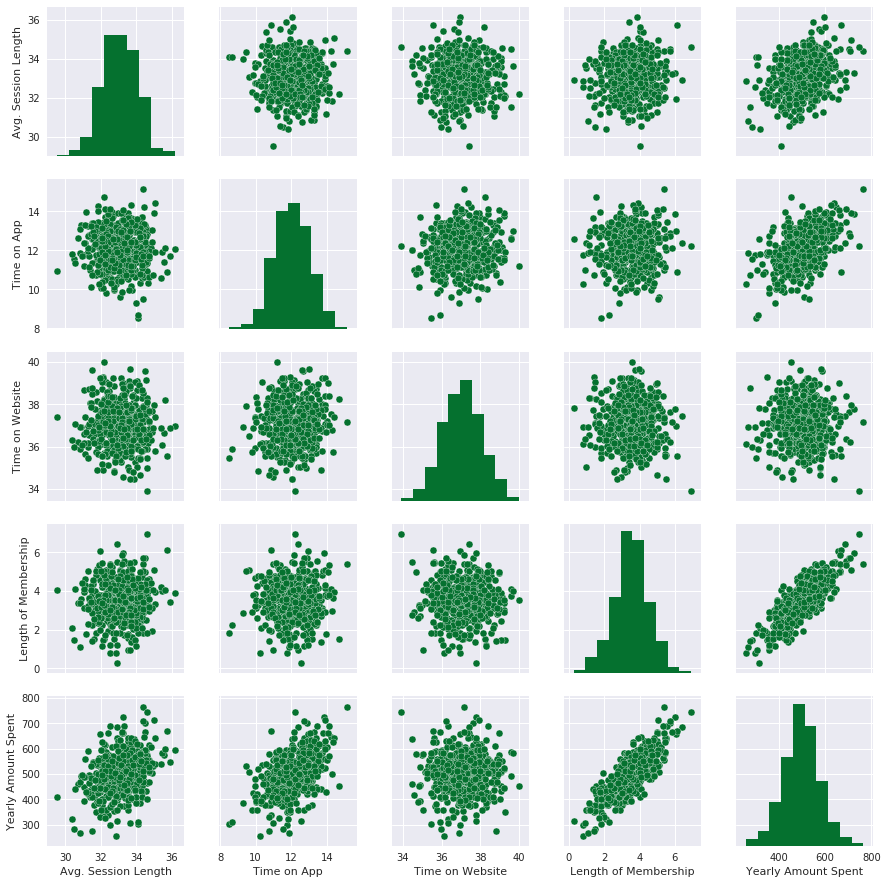

In [20]:
#lets just compare all the columns
sns.pairplot(customers)

#We can see some correlations here, length of membership and amount spent seems to be the one that stands out the most.

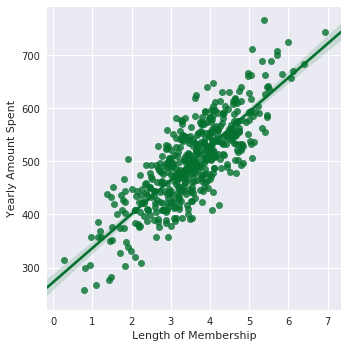

In [21]:
#quick lmplot to see in detail
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

In [24]:
#time for some linear regressing based training and testing data
#first we will set a variable X to be our input data set and y to be our predicted variable. 
#Here x will be all numerical columns but price, and y will be price


X=customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y=customers['Yearly Amount Spent']


In [25]:
#import from sklearn
from sklearn.model_selection import train_test_split

In [26]:
#set our test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
#import Linear Regression
from sklearn.linear_model import LinearRegression

In [28]:
#set a blank linear regression and train/fit it
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
#view our coefficients from the model

pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


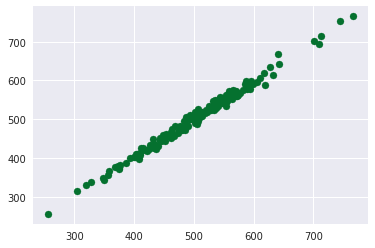

In [34]:
#test our model by using our test set 
predictions=lm.predict(X_test)
plt.scatter(y_test,predictions)


#We can see our model works well in this instance

In [36]:
#lets evaluate our model with Mean Absolute Error, Mean Squared Error, and Root Means Squared Error
#first we need to import metrics from sklearn
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


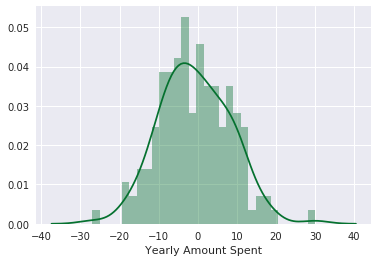

In [38]:
#plotting the residuals
sns.distplot((y_test-predictions),bins=30);

In [39]:
#lets start evaluating what impacts sales the most
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [ ]:
#we can see that time on the app and length of membership increase the total spent the most. 
#To guide this company we would need more info
#but we could potentially say develop the website to either catch up to the app, 
#or develop the app more to foster continued sale
#or develop a way to increase continued membership
